## Chapter5.4 ランダムフォレスト

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

プロット用関数を定義

In [2]:
def plot_dataset(dataset):
    fig, ax = plt.subplots()
    ax.tick_params(direction='in')
    for key, g in dataset.groupby('y'):
        color = 'k' if key == 1 else 'w'
        g.plot(ax=ax, kind='scatter', x='x0', y='x1',
               label=key, color=color, s=40,
               edgecolor='black', linewidth='1',
               xticks=np.arange(-2.5, 2.5, 1), yticks=np.arange(-2.5, 2.5, 1),
               xlim=(-2.5, 2.5), ylim=(-2.5, 2.5), figsize=(5, 5))
        plt.grid(which='major', color='grey', linestyle='--')
    return fig, ax


def plot_boundary(clf):
    # 0.01刻みのグリッド点を生成する
    xx, yy = np.meshgrid(np.arange(-2.5, 2.5, 0.01),
                         np.arange(-2.5, 2.5, 0.01))
    # 生成したグリッド点1つ1つを推論をする
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 描画用に2次元配列に変換
    Z = Z.reshape(xx.shape)

    # 識別境界を描画
    plt.contour(xx, yy, Z, colors='b', levels=[0], linestyles=['-'])

データセットを作成

(<matplotlib.figure.Figure at 0x1098973d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x109897a10>)

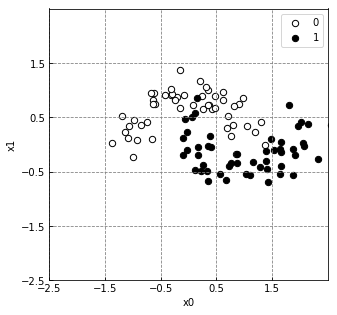

In [3]:
from sklearn.datasets import make_moons

X_dataset, y_dataset = make_moons(n_samples=100, noise=0.2, random_state=42)

dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

plot_dataset(dataset)

ランダムフォレストで学習し、識別境界をプロット

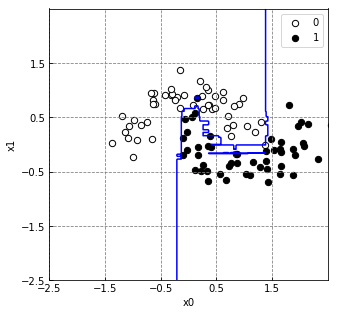

In [4]:
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレストで学習
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_dataset, y_dataset)

plot_dataset(dataset)
plot_boundary(classifier)

決定木の階層を変えて学習

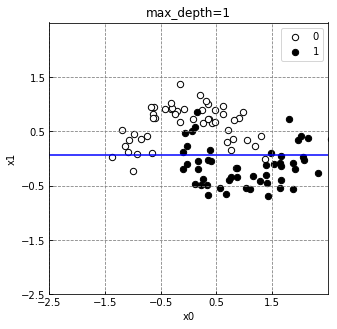

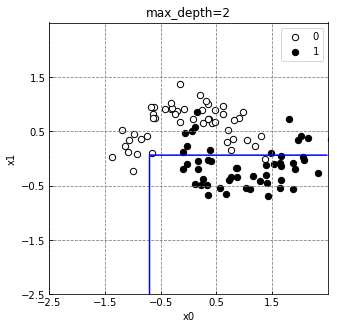

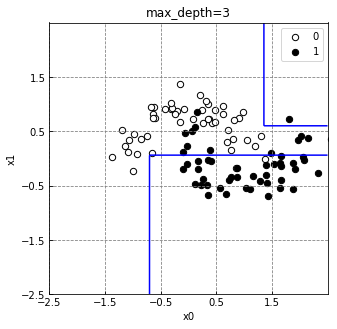

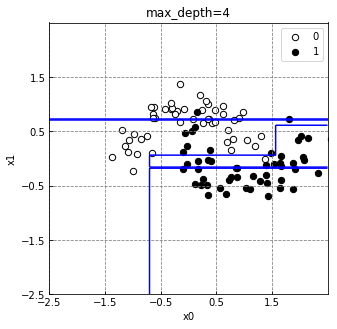

In [5]:
from sklearn.ensemble import RandomForestClassifier

# 決定木の数を1に制限
classifier = RandomForestClassifier(random_state=42, n_estimators=1)

# 決定木の階層を1から4まで変える
for depth in range(1, 5):
    classifier.max_depth = depth
    classifier.fit(X_dataset, y_dataset)

    plot_dataset(dataset)
    plot_boundary(classifier)
    plt.title('max_depth=%d' % depth)
    plt.show()

手書き文字データセットを読み込む

In [6]:
from sklearn.datasets import load_digits

# 手書き数字のデータセットを読み込む
X_dataset, y_dataset = load_digits(return_X_y=True)

# 最初のデータ(index=0)を表示
print(X_dataset[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


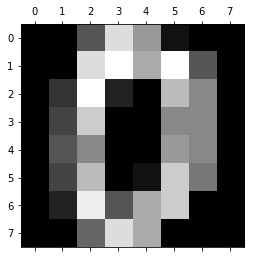

In [7]:
# 最初のデータ(index=0)を可視化する
plt.gray()
plt.matshow(X_dataset[0].reshape(8, 8))

特徴量の重要度をプロット

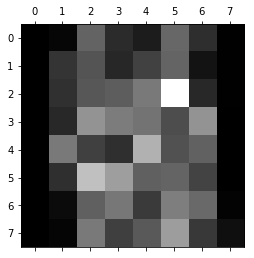

In [8]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_dataset, y_dataset)

plt.gray()
plt.matshow(classifier.feature_importances_.reshape(8, 8))